For this assignment, you will be working with a modified version of weather data from London from Kaggle.

The assignment is split into 2 parts:

Part 1: Load the data and create a datetime index

Part 2: Answer 2 Questions using visualizations and the correct frequency data

**Part 1: Load the data and make a datetime index**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
import numpy as np

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [3]:
df = pd.read_csv('Data/london_weather_MODIFIED - london_weather_MODIFIED.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


You must first load the data and create a datetime index.

**One - Convert the date column to datetime dtype.**

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

**Two - Set the date column as the index**

In [5]:
df = df.set_index('date')

In [6]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

**Three - Filter out only the required data**

Keep only data from the year 2000 or later.

Keep only the following features:

precipitation

mean_temp

min_temp

max_temp

snow_depth

In [7]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00
...,...,...,...,...,...
2020-12-27,2.00,7.50,7.60,7.50,NaN
2020-12-28,0.20,1.10,-1.30,3.60,NaN
2020-12-29,0.00,2.60,1.10,4.10,NaN


**Four - Impute any missing values**

In [8]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [9]:
df.isna().sum().sum()

3337

In [10]:
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [11]:
df.isna().sum()

precipitation      0
mean_temp        419
min_temp         386
max_temp         390
snow_depth         0
dtype: int64

In [12]:
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [13]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

**Part 2: Answer the Questions with Visualizations**

Using the Correct Frequency

**Q1: What month had the most precipitation between 2000 through 2010?**

    -Resample the data as Monthly frequency.
    -Find the date and corresponding value for the max precipitation.
    -Plot the feature and time period that corresponds to the question.
    -Make sure to meet the "Visualization Requirements" below!
    -Determine the date and value for the most precipitation (the max precipitation).
    -Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
    -Make sure to add a legend so that your label is visible.

In [14]:
quesone = df['precipitation'].copy()
quesone.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

In [15]:
#Filter data between 2000 through 2010
filter_date = quesone.index <= '2010-12-31'

In [17]:
#Apply the filter
quesone = quesone [filter_date]

In [18]:
#Confirm that the filter is working correctly
quesone.head()

date
2000-01-01   0.00
2000-01-02   0.20
2000-01-03   6.00
2000-01-04   0.20
2000-01-05   0.80
Name: precipitation, dtype: float64

In [20]:
quesone.tail()

date
2010-12-27   5.00
2010-12-28   0.40
2010-12-29   1.40
2010-12-30   0.00
2010-12-31   0.00
Name: precipitation, dtype: float64

In [21]:
#Setting frequency to monthly
quesone = quesone.asfreq('M')
## Preview the index again
quesone.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=132, freq='M')

In [22]:
#Find the date and corresponding value for the max precipitation.
date_max = quesone.idxmax()
date_max

Timestamp('2002-04-30 00:00:00', freq='M')

In [23]:
#Find the value for the max precipitation
quesone[quesone.index == '2003-01-01 00:00:00']

Series([], Freq: M, Name: precipitation, dtype: float64)

In [24]:
quesone.sort_values(ascending=False)

date
2002-04-30   13.80
2008-08-31   13.40
2007-06-30   12.00
2002-12-31   11.80
2006-09-30   11.40
              ... 
2004-11-30    0.00
2004-10-31    0.00
2004-08-31    0.00
2004-07-31    0.00
2010-12-31    0.00
Name: precipitation, Length: 132, dtype: float64

April 30th, 2002 had the most precipitation between 2000 through 2010.

The precipitation was 13.80 inches total.

**Plot**

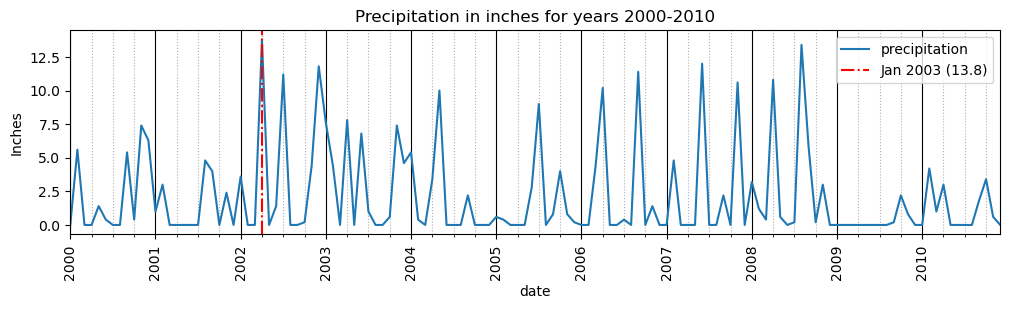

In [28]:
fig, ax = plt.subplots(figsize=(12,3))
quesone.plot(ax = ax, title='Precipitation in inches for years 2000-2010', ylabel='Inches')
## Making major & minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')
# Add a line for the max precipitation date and value
ax.axvline(date_max, color = 'red', ls ="-.", label=f'Jan 2003 ({quesone.max()})')
ax.legend();

**Q2: Which year between 2000-2020 had the coolest average temperature?**

    -Resample the data as Yearly frequency.
    -Plot the feature and time period that corresponds to the question.
    -Make sure to meet the "Visualization Requirements" below!
    -Determine the date and value for the lowest mean temp.
    -Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.


In [29]:
#Create a temporary dataframe
questwo = df['mean_temp'].copy()

In [30]:
#Filter data between 2000 through 2020
data = questwo.index <= '2020-12-31'

In [31]:
#Apply the filter
questwo = questwo[data]

In [32]:
questwo.head()

date
2000-01-01   7.00
2000-01-02   7.90
2000-01-03   9.40
2000-01-04   7.00
2000-01-05   6.40
Name: mean_temp, dtype: float64

In [33]:
questwo.tail()

date
2020-12-27    7.50
2020-12-28    1.10
2020-12-29    2.60
2020-12-30    2.70
2020-12-31   -0.80
Name: mean_temp, dtype: float64

In [34]:
#Resample the data as Yearly frequency
qtwo_temp = questwo.asfreq("Y")
qtwo_temp.head(5)

date
2000-12-31    2.80
2001-12-31    1.00
2002-12-31    7.30
2003-12-31    3.30
2004-12-31   10.60
Freq: A-DEC, Name: mean_temp, dtype: float64

In [35]:
qtwo_temp.index

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', name='date', freq='A-DEC')

**Plot**

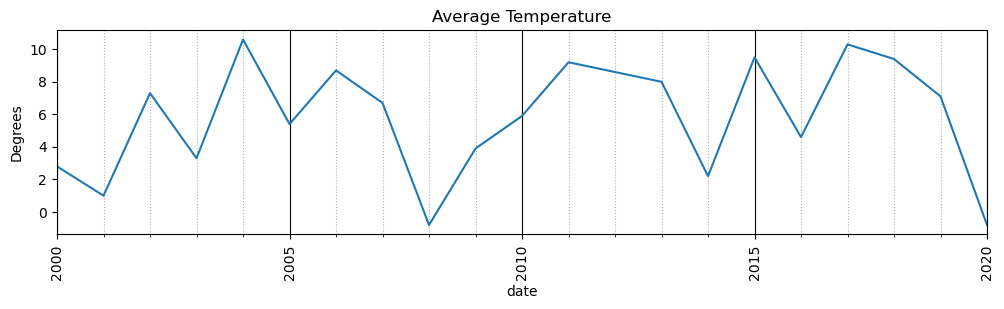

In [36]:
fig, ax = plt.subplots(figsize=(12,3))
qtwo_temp.plot(ax = ax, title='Average Temperature', ylabel='Degrees')
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

**Date and value for the lowest mean temp.**

In [37]:
# Determine the date and value for the lowest mean temp.
low_date = qtwo_temp.idxmin()
low_date

Timestamp('2008-12-31 00:00:00', freq='A-DEC')

In [38]:
#Find the value for the max precipitation
qtwo_temp[qtwo_temp.index == '2008-12-31 00:00:00']

date
2008-12-31   -0.80
Freq: A-DEC, Name: mean_temp, dtype: float64

In [39]:
#Check
qtwo_temp.sort_values(ascending=True)

date
2020-12-31   -0.80
2008-12-31   -0.80
2001-12-31    1.00
2014-12-31    2.20
2000-12-31    2.80
2003-12-31    3.30
2009-12-31    3.90
2016-12-31    4.60
2005-12-31    5.40
2010-12-31    5.90
2007-12-31    6.70
2019-12-31    7.10
2002-12-31    7.30
2013-12-31    8.00
2012-12-31    8.60
2006-12-31    8.70
2011-12-31    9.20
2018-12-31    9.40
2015-12-31    9.50
2017-12-31   10.30
2004-12-31   10.60
Name: mean_temp, dtype: float64

The lowest average temperature between years 2000 and 2020 was -0.8 degrees on December 31st in the years 2008 and 2020.

**Plot Two**

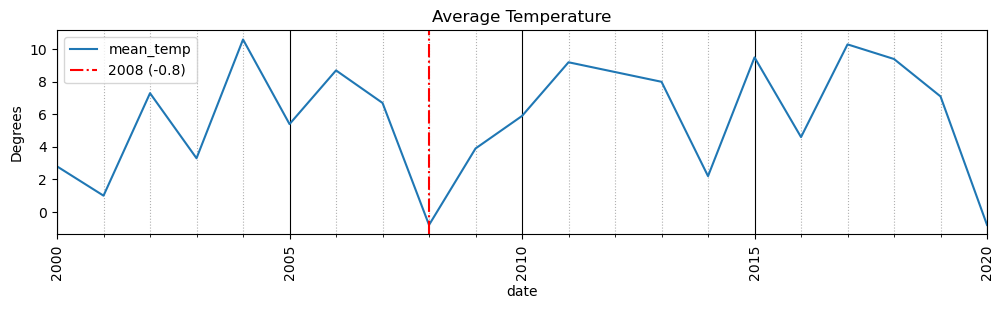

In [42]:
fig, ax = plt.subplots(figsize=(12,3))
qtwo_temp.plot(ax = ax, title='Average Temperature', ylabel='Degrees')
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')
# Add a line for the max precipitation date and value
ax.axvline(low_date, color = 'red', ls ="-.", label=f'2008 ({qtwo_temp.min()})')
ax.legend();